## Importing and prepping data

In [1]:
import pandas as pd
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.pca as pca

In [2]:
features = []
remote_folder = '09_26_18_tissue_study' #Folder in AWS S3 containing files to be analyzed
bucket = 'hpontes.data'
vids = 5
types = ['10K', '1K', '5K', 'COOH']
slices = [1, 2, 3, 4, 5, 6]
nonnum = ['Surface Functionality', 'Slice', 'Video Number', 'Track_ID', 'Mean Mean_Intensity', 'Std Mean_Intensity', 'X', 'Y',
          'Mean X', 'Mean Y', 'Std X', 'Std Y']

counter = 0
for typ in types:
    for slic in slices:
        for num in range(1, vids+1):
            try: 
                filename = 'features_{}_tissue_S{}_XY{}.csv'.format(typ, slic, num)
                print(filename)
                aws.download_s3('{}/{}'.format(remote_folder, filename), filename, bucket_name=bucket)
                fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
                print('{} size: {}'.format(filename, fstats.shape))
                fstats['Surface Functionality'] = pd.Series(fstats.shape[0]*[typ], index=fstats.index)
                fstats['Slice'] = pd.Series(fstats.shape[0]*[slic], index=fstats.index)
                fstats['Video Number'] = pd.Series(fstats.shape[0]*[num], index=fstats.index)
                counter = counter + 1
                if counter == 1:
                    fstats_tot = fstats
                else:
                    fstats_tot = fstats_tot.append(fstats, ignore_index=True)
            except:
                print('Skipped!')

features_10K_tissue_S1_XY1.csv
features_10K_tissue_S1_XY1.csv size: (2122, 67)
features_10K_tissue_S1_XY2.csv
features_10K_tissue_S1_XY2.csv size: (797, 67)
features_10K_tissue_S1_XY3.csv
features_10K_tissue_S1_XY3.csv size: (1611, 67)
features_10K_tissue_S1_XY4.csv
features_10K_tissue_S1_XY4.csv size: (2575, 67)
features_10K_tissue_S1_XY5.csv
features_10K_tissue_S1_XY5.csv size: (1523, 67)
features_10K_tissue_S2_XY1.csv
features_10K_tissue_S2_XY1.csv size: (2762, 67)
features_10K_tissue_S2_XY2.csv
features_10K_tissue_S2_XY2.csv size: (3170, 67)
features_10K_tissue_S2_XY3.csv
features_10K_tissue_S2_XY3.csv size: (1356, 67)
features_10K_tissue_S2_XY4.csv
features_10K_tissue_S2_XY4.csv size: (1783, 67)
features_10K_tissue_S2_XY5.csv
features_10K_tissue_S2_XY5.csv size: (1474, 67)
features_10K_tissue_S3_XY1.csv
features_10K_tissue_S3_XY1.csv size: (2013, 67)
features_10K_tissue_S3_XY2.csv
features_10K_tissue_S3_XY2.csv size: (1212, 67)
features_10K_tissue_S3_XY3.csv
features_10K_tissue_S3

features_COOH_tissue_S4_XY2.csv
features_COOH_tissue_S4_XY2.csv size: (380, 67)
features_COOH_tissue_S4_XY3.csv
features_COOH_tissue_S4_XY3.csv size: (311, 67)
features_COOH_tissue_S4_XY4.csv
features_COOH_tissue_S4_XY4.csv size: (570, 67)
features_COOH_tissue_S4_XY5.csv
features_COOH_tissue_S4_XY5.csv size: (1281, 67)
features_COOH_tissue_S5_XY1.csv
features_COOH_tissue_S5_XY1.csv size: (1931, 67)
features_COOH_tissue_S5_XY2.csv
features_COOH_tissue_S5_XY2.csv size: (898, 67)
features_COOH_tissue_S5_XY3.csv
features_COOH_tissue_S5_XY3.csv size: (1203, 67)
features_COOH_tissue_S5_XY4.csv
features_COOH_tissue_S5_XY4.csv size: (308, 67)
features_COOH_tissue_S5_XY5.csv
features_COOH_tissue_S5_XY5.csv size: (265, 67)
features_COOH_tissue_S6_XY1.csv
features_COOH_tissue_S6_XY1.csv size: (3435, 67)
features_COOH_tissue_S6_XY2.csv
features_COOH_tissue_S6_XY2.csv size: (3511, 67)
features_COOH_tissue_S6_XY3.csv
features_COOH_tissue_S6_XY3.csv size: (8450, 67)
features_COOH_tissue_S6_XY4.csv
fe

In [ ]:
fstats_tot.to_csv('features.csv')

In [ ]:
#PCA analyses with too many datapoints fail. You get rows with lots of NAs. I'm going to try making a subset of the data first
#and then do a PCA analysis on that.

#include all in analysis
import random
subset = np.sort(np.array(random.sample(range(fstats_tot.shape[0]), 500000)))
fstats_sub = fstats_tot.loc[subset, :].reset_index(drop=True)

In [ ]:
for typ in types:
    fstats_type = fstats_tot[fstats_tot['Surface Functionality']==typ].reset_index(drop=True)
    print(fstats_type.shape)

In [ ]:
#with equal sample sizes for each particle type
import random
counter = 0
for typ in types:
    fstats_type = fstats_tot[fstats_tot['Surface Functionality']==typ].reset_index(drop=True)
    print(fstats_type.shape)
    subset = np.sort(np.array(random.sample(range(fstats_type.shape[0]), 25000)))
    if counter == 0:
        fstats_sub = fstats_type.loc[subset, :].reset_index(drop=True)
    else:
        fstats_sub = fstats_sub.append(fstats_type.loc[subset, :].reset_index(drop=True), ignore_index=True)
    counter = counter + 1

In [ ]:
#fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
nonnum = ['Surface Functionality', 'Slice', 'Video Number', 'Track_ID', 'Mean Mean_Intensity', 'Std Mean_Intensity', 'X', 'Y',
          'Mean X', 'Mean Y', 'Std X', 'Std Y']

fstats_num = fstats_tot.drop(nonnum, axis=1)
fstats_raw = fstats_num.as_matrix()
#fstats

## PCA analysis

The pca.pca_analysis function provides a completely contained PCA analysis of the input trajectory features dataset. It includes options to impute NaN values (fill in with average values or drop them), and to scale features. Read the docstring for more information. 

In [4]:
ncomp = 13
pcadataset = pca.pca_analysis(fstats_tot, dropcols=nonnum, n_components=ncomp)

Cumulative explained variance:
0 component: 0.29430808483322174
1 component: 0.4197536291704136
2 component: 0.4916367031506177
3 component: 0.5507787881273452
4 component: 0.6056790670589106
5 component: 0.6421946527602935
6 component: 0.6756074759166862
7 component: 0.702072893983067
8 component: 0.726122505140986
9 component: 0.7480794300550829
10 component: 0.768627789265083
11 component: 0.7867045542245297
12 component: 0.8042991075070928


In [5]:
pcadataset.components.to_csv('components.csv')

In [6]:
pcadataset.prcomps

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Mean Deff1,Mean asymmetry1,asymmetry2,Std asymmetry1,Mean Quality,trappedness,D_fit,efficiency,Std MSD_ratio,Std AR,D_fit,Deff2,SN_Ratio
1,Std frames,Mean asymmetry2,asymmetry1,Std asymmetry2,Std Quality,boundedness,straightness,straightness,Mean MSD_ratio,Mean AR,fractal_dim,kurtosis,Mean SN_Ratio
2,Std fractal_dim,asymmetry3,asymmetry3,Std elongation,Quality,frames,frames,Std alpha,Std kurtosis,Std boundedness,Std boundedness,Std MSD_ratio,kurtosis
3,Mean D_fit,asymmetry2,elongation,Std asymmetry3,Mean_Intensity,alpha,alpha,Mean Deff2,Mean kurtosis,Std trappedness,Std trappedness,Mean MSD_ratio,frames
4,Mean straightness,asymmetry1,Mean Quality,Std trappedness,Mean asymmetry1,kurtosis,trappedness,Mean alpha,SN_Ratio,Mean kurtosis,Mean frames,Std kurtosis,Std straightness


The pca.kmo function calculates the Kaiser-Meyer-Olkin statistic, a measure of sampling adequacy. Check the docstring for more information.

In [21]:
kmostat = pca.kmo(pcadataset.scaled)

0.915307998166


In [ ]:
import scipy.stats as stat
stat.bartlett(pcadataset.scaled[0, :], pcadataset.scaled[1, :], pcadataset.scaled[2, :], pcadataset.scaled[3, :])

In [ ]:
newstr = ''
for i in range(pcadataset.scaled.shape[0]-1):
    newstr = newstr + 'pcadataset.scaled[{}, :], '.format(i)

newstr = 'stat.bartlett(' + newstr + 'pcadataset.scaled[{}, :])'.format(i+1)

In [ ]:
test = eval(newstr)

In [ ]:
test

## Visualization

Users can then compare average principle component values between subgroups of the data. In this case, all particles were taken from the same sample, so there are no experimental subgroups. I chose to compare short trajectories to long trajectories, as I would expect differences between the two groups.

In [7]:
import numpy as np
#ncomp = 14
dicti = {}
#test = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==200].as_matrix()), axis=0))[-6:]
#test1 = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==500].as_matrix()), axis=0))[-6:]
dicti[0] = np.nanmean(pcadataset.final[pcadataset.final['Surface Functionality']=='10K'].values[:, -ncomp:], axis=0)
dicti[1] = np.nanmean(pcadataset.final[pcadataset.final['Surface Functionality']=='5K'].values[:, -ncomp:], axis=0)
dicti[2] = np.nanmean(pcadataset.final[pcadataset.final['Surface Functionality']=='1K'].values[:, -ncomp:], axis=0)
dicti[3] = np.nanmean(pcadataset.final[pcadataset.final['Surface Functionality']=='COOH'].values[:, -ncomp:], axis=0)

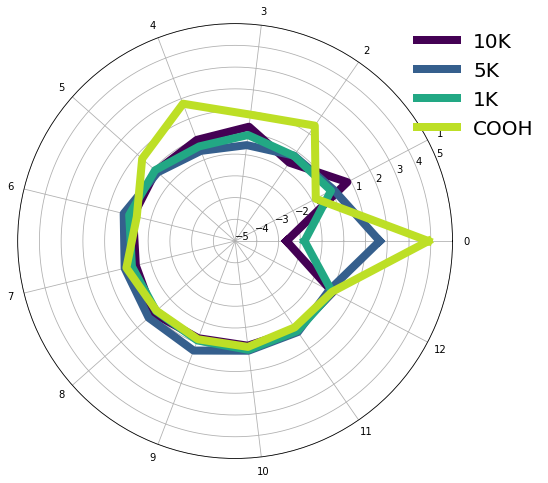

In [8]:
pca.plot_pca(dicti, savefig=True, labels=['10K', '5K', '1K', 'COOH'], rticks=np.linspace(-5, 5, 11))

The variable pcadataset.prcomps shows the user the major contributions to each of the new principle components. When observing the graph above, users can see that there are some differences between short trajectories and long trajectories in component 0 (asymmetry1 being the major contributor) and component 1 (elongation being the major contributor).

In [9]:
pcadataset.prcomps

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Mean Deff1,Mean asymmetry1,asymmetry2,Std asymmetry1,Mean Quality,trappedness,D_fit,efficiency,Std MSD_ratio,Std AR,D_fit,Deff2,SN_Ratio
1,Std frames,Mean asymmetry2,asymmetry1,Std asymmetry2,Std Quality,boundedness,straightness,straightness,Mean MSD_ratio,Mean AR,fractal_dim,kurtosis,Mean SN_Ratio
2,Std fractal_dim,asymmetry3,asymmetry3,Std elongation,Quality,frames,frames,Std alpha,Std kurtosis,Std boundedness,Std boundedness,Std MSD_ratio,kurtosis
3,Mean D_fit,asymmetry2,elongation,Std asymmetry3,Mean_Intensity,alpha,alpha,Mean Deff2,Mean kurtosis,Std trappedness,Std trappedness,Mean MSD_ratio,frames
4,Mean straightness,asymmetry1,Mean Quality,Std trappedness,Mean asymmetry1,kurtosis,trappedness,Mean alpha,SN_Ratio,Mean kurtosis,Mean frames,Std kurtosis,Std straightness


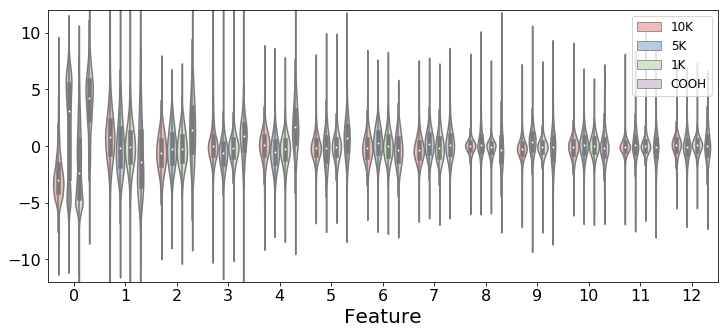

In [10]:
labels=['10K', '5K', '1K', 'COOH']
feats = pca.feature_violin(pcadataset.final, label='Surface Functionality', lvals=labels, fsubset=ncomp, yrange=[-12, 12])

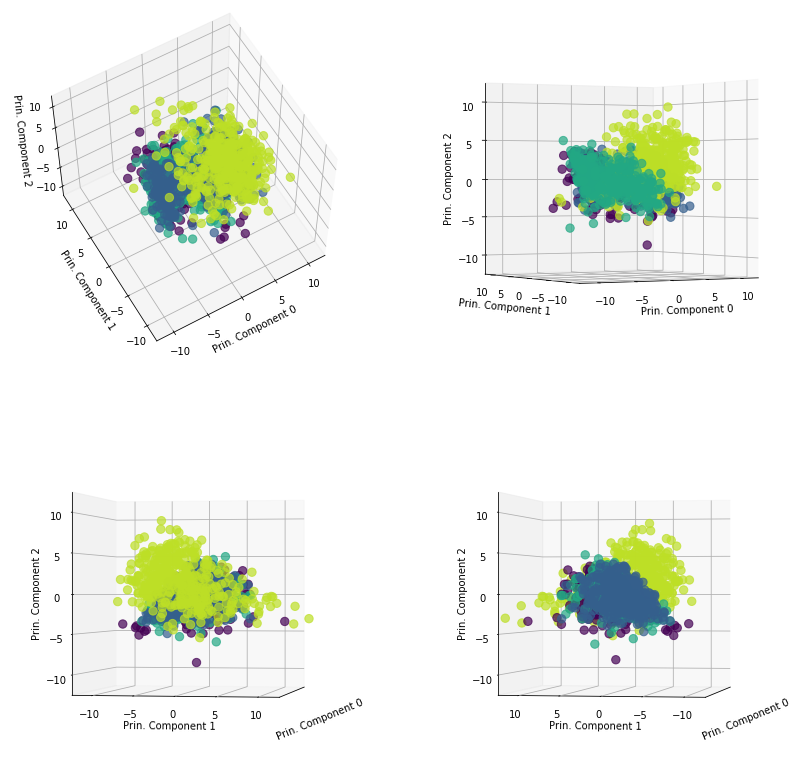

In [11]:
fstats1 = pca.feature_plot_3D(pcadataset.final, label='Surface Functionality', lvals=labels, randcount=400, ylim=[-12, 12],
                              xlim=[-12, 12], zlim=[-12, 12])

In [12]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [13]:
featofvar = 'Surface Functionality'
test = pcadataset.final.values[:, -ncomp:]
y = pcadataset.final[featofvar].values

for run in range(1):
    X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.62155849
Validation score: 0.751090
Iteration 2, loss = 0.57508119
Validation score: 0.749276
Iteration 3, loss = 0.56005627
Validation score: 0.762003
Iteration 4, loss = 0.55046026
Validation score: 0.756690
Iteration 5, loss = 0.54318455
Validation score: 0.768144
Iteration 6, loss = 0.53685669
Validation score: 0.753508
Iteration 7, loss = 0.53093537
Validation score: 0.771008
Iteration 8, loss = 0.52694403
Validation score: 0.763403
Iteration 9, loss = 0.52206105
Validation score: 0.771485
Iteration 10, loss = 0.51824725
Validation score: 0.774794
Iteration 11, loss = 0.51501694
Validation score: 0.779185
Iteration 12, loss = 0.51170144
Validation score: 0.776480
Iteration 13, loss = 0.50772955
Validation score: 0.779598
Iteration 14, loss = 0.50435089
Validation score: 0.779885
Iteration 15, loss = 0.50158929
Validation score: 0.788476
Iteration 16, loss = 0.49953946
Validation score: 0.787935
Iteration 17, loss = 0.49603341
Validation score: 0.787680
Iterat

In [15]:
for run in range(1):
    X_train = pcadataset.final[pcadataset.final.Slice.isin([1, 2, 3, 4, 5])].values[:, -ncomp:]
    X_test = pcadataset.final[pcadataset.final.Slice.isin([6])].values[:, -ncomp:]
    y_train = pcadataset.final[pcadataset.final.Slice.isin([1, 2, 3, 4, 5])][featofvar].values
    y_test = pcadataset.final[pcadataset.final.Slice.isin([6])][featofvar].values

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.53160737
Validation score: 0.788024
Iteration 2, loss = 0.49556798
Validation score: 0.792161
Iteration 3, loss = 0.48244158
Validation score: 0.797707
Iteration 4, loss = 0.47289598
Validation score: 0.799279
Iteration 5, loss = 0.46513583
Validation score: 0.802260
Iteration 6, loss = 0.45882223
Validation score: 0.800989
Iteration 7, loss = 0.45318665
Validation score: 0.809471
Iteration 8, loss = 0.44782724
Validation score: 0.814070
Iteration 9, loss = 0.44316569
Validation score: 0.807091
Iteration 10, loss = 0.43931165
Validation score: 0.814116
Iteration 11, loss = 0.43484394
Validation score: 0.816150
Iteration 12, loss = 0.43091931
Validation score: 0.816843
Iteration 13, loss = 0.42721349
Validation score: 0.823592
Iteration 14, loss = 0.42385399
Validation score: 0.821350
Iteration 15, loss = 0.42118769
Validation score: 0.822598
Iteration 16, loss = 0.41840967
Validation score: 0.826319
Iteration 17, loss = 0.41551020
Validation score: 0.826920
Iterat

In [16]:
for run in range(1):
    X_train = pcadataset.final[pcadataset.final.Slice.isin([1, 2, 3, 4, 6])].values[:, -ncomp:]
    X_test = pcadataset.final[pcadataset.final.Slice.isin([5])].values[:, -ncomp:]
    y_train = pcadataset.final[pcadataset.final.Slice.isin([1, 2, 3, 4, 6])][featofvar].values
    y_test = pcadataset.final[pcadataset.final.Slice.isin([5])][featofvar].values

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.56994819
Validation score: 0.773801
Iteration 2, loss = 0.52218248
Validation score: 0.759482
Iteration 3, loss = 0.50631745
Validation score: 0.775435
Iteration 4, loss = 0.49507658
Validation score: 0.793678
Iteration 5, loss = 0.48671207
Validation score: 0.801188
Iteration 6, loss = 0.47938271
Validation score: 0.801146
Iteration 7, loss = 0.47288842
Validation score: 0.803458
Iteration 8, loss = 0.46700702
Validation score: 0.798154
Iteration 9, loss = 0.46177772
Validation score: 0.806491
Iteration 10, loss = 0.45695447
Validation score: 0.810734
Iteration 11, loss = 0.45263122
Validation score: 0.811561
Iteration 12, loss = 0.44832082
Validation score: 0.811583
Iteration 13, loss = 0.44418279
Validation score: 0.815125
Iteration 14, loss = 0.44092368
Validation score: 0.812749
Iteration 15, loss = 0.43721156
Validation score: 0.820916
Iteration 16, loss = 0.43489000
Validation score: 0.793233
Iteration 17, loss = 0.43241765
Validation score: 0.821362
Iterat

In [17]:
for run in range(1):
    X_train = pcadataset.final[pcadataset.final.Slice.isin([1, 2, 3, 5, 6])].values[:, -ncomp:]
    X_test = pcadataset.final[pcadataset.final.Slice.isin([4])].values[:, -ncomp:]
    y_train = pcadataset.final[pcadataset.final.Slice.isin([1, 2, 3, 5, 6])][featofvar].values
    y_test = pcadataset.final[pcadataset.final.Slice.isin([4])][featofvar].values

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.63009893
Validation score: 0.736254
Iteration 2, loss = 0.58797057
Validation score: 0.736197
Iteration 3, loss = 0.57515299
Validation score: 0.748338
Iteration 4, loss = 0.56544265
Validation score: 0.755859
Iteration 5, loss = 0.55732219
Validation score: 0.759521
Iteration 6, loss = 0.55073053
Validation score: 0.758901
Iteration 7, loss = 0.54402056
Validation score: 0.759887
Iteration 8, loss = 0.53780794
Validation score: 0.767887
Iteration 9, loss = 0.53128376
Validation score: 0.761803
Iteration 10, loss = 0.52650288
Validation score: 0.770732
Iteration 11, loss = 0.52199491
Validation score: 0.776113
Iteration 12, loss = 0.51703856
Validation score: 0.783718
Iteration 13, loss = 0.51298567
Validation score: 0.776535
Iteration 14, loss = 0.50905708
Validation score: 0.776901
Iteration 15, loss = 0.50459262
Validation score: 0.774085
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.001000
Iterat

In [18]:
for run in range(1):
    X_train = pcadataset.final[pcadataset.final.Slice.isin([1, 2, 5, 4, 6])].values[:, -ncomp:]
    X_test = pcadataset.final[pcadataset.final.Slice.isin([3])].values[:, -ncomp:]
    y_train = pcadataset.final[pcadataset.final.Slice.isin([1, 2, 5, 4, 6])][featofvar].values
    y_test = pcadataset.final[pcadataset.final.Slice.isin([3])][featofvar].values

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.56974125
Validation score: 0.773863
Iteration 2, loss = 0.52670739
Validation score: 0.779484
Iteration 3, loss = 0.51083471
Validation score: 0.775509
Iteration 4, loss = 0.49971091
Validation score: 0.791772
Iteration 5, loss = 0.49093099
Validation score: 0.792214
Iteration 6, loss = 0.48390408
Validation score: 0.800466
Iteration 7, loss = 0.47783621
Validation score: 0.796149
Iteration 8, loss = 0.47236040
Validation score: 0.792676
Iteration 9, loss = 0.46711082
Validation score: 0.799000
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.001000
Iteration 10, loss = 0.43463382
Validation score: 0.818034
Iteration 11, loss = 0.43035514
Validation score: 0.816608
Iteration 12, loss = 0.42750419
Validation score: 0.817693
Iteration 13, loss = 0.42516513
Validation score: 0.821909
Iteration 14, loss = 0.42283620
Validation score: 0.821668
Iteration 15, loss = 0.42076304
Validation score: 0.820805
Iterat

In [19]:
for run in range(1):
    X_train = pcadataset.final[pcadataset.final.Slice.isin([1, 5, 3, 4, 6])].values[:, -ncomp:]
    X_test = pcadataset.final[pcadataset.final.Slice.isin([2])].values[:, -ncomp:]
    y_train = pcadataset.final[pcadataset.final.Slice.isin([1, 5, 3, 4, 6])][featofvar].values
    y_test = pcadataset.final[pcadataset.final.Slice.isin([2])][featofvar].values

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.57905633
Validation score: 0.766104
Iteration 2, loss = 0.53313294
Validation score: 0.775131
Iteration 3, loss = 0.51837145
Validation score: 0.781866
Iteration 4, loss = 0.50740035
Validation score: 0.780881
Iteration 5, loss = 0.49915030
Validation score: 0.795155
Iteration 6, loss = 0.49233966
Validation score: 0.796120
Iteration 7, loss = 0.48575115
Validation score: 0.787998
Iteration 8, loss = 0.48066824
Validation score: 0.796281
Iteration 9, loss = 0.47609464
Validation score: 0.804684
Iteration 10, loss = 0.47145918
Validation score: 0.806514
Iteration 11, loss = 0.46734148
Validation score: 0.809067
Iteration 12, loss = 0.46299590
Validation score: 0.812425
Iteration 13, loss = 0.46017280
Validation score: 0.812384
Iteration 14, loss = 0.45651378
Validation score: 0.803900
Iteration 15, loss = 0.45376003
Validation score: 0.816727
Iteration 16, loss = 0.45146252
Validation score: 0.815903
Iteration 17, loss = 0.44877588
Validation score: 0.808645
Iterat

In [20]:
for run in range(1):
    X_train = pcadataset.final[pcadataset.final.Slice.isin([5, 2, 3, 4, 6])].values[:, -ncomp:]
    X_test = pcadataset.final[pcadataset.final.Slice.isin([1])].values[:, -ncomp:]
    y_train = pcadataset.final[pcadataset.final.Slice.isin([5, 2, 3, 4, 6])][featofvar].values
    y_test = pcadataset.final[pcadataset.final.Slice.isin([1])][featofvar].values

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.62886851
Validation score: 0.743450
Iteration 2, loss = 0.58681472
Validation score: 0.753518
Iteration 3, loss = 0.57397973
Validation score: 0.755548
Iteration 4, loss = 0.56455216
Validation score: 0.760651
Iteration 5, loss = 0.55678122
Validation score: 0.759965
Iteration 6, loss = 0.55024946
Validation score: 0.767865
Iteration 7, loss = 0.54409868
Validation score: 0.769237
Iteration 8, loss = 0.53809023
Validation score: 0.770197
Iteration 9, loss = 0.53266993
Validation score: 0.773462
Iteration 10, loss = 0.52767262
Validation score: 0.779195
Iteration 11, loss = 0.52378449
Validation score: 0.771267
Iteration 12, loss = 0.51841522
Validation score: 0.768771
Iteration 13, loss = 0.51495078
Validation score: 0.776589
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.001000
Iteration 14, loss = 0.48400993
Validation score: 0.796148
Iteration 15, loss = 0.47962204
Validation score: 0.799358
Iterat

In [ ]:
featofvar = 'Surface Functionality'
test = pcadataset.final.values[:, -ncomp:]
y = pcadataset.final[featofvar].values

for run in range(1):
    X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

In [26]:
pcadataset.final['Surface Func 2'] = pcadataset.final[featofvar].replace(['10K', '5K', '1K'], 'PEG')

In [36]:
pcadataset.final = pcadataset.final[pcadataset.final.columns.tolist()[-1:] + pcadataset.final.columns.tolist()[:-1]]

In [38]:
featofvar = 'Surface Func 2'
test = pcadataset.final.values[:, -ncomp:]
y = pcadataset.final[featofvar].values

for run in range(1):
    X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.10166755
Validation score: 0.965955
Iteration 2, loss = 0.08486439
Validation score: 0.968850
Iteration 3, loss = 0.08069840
Validation score: 0.969455
Iteration 4, loss = 0.07808278
Validation score: 0.970982
Iteration 5, loss = 0.07576617
Validation score: 0.971682
Iteration 6, loss = 0.07418952
Validation score: 0.972159
Iteration 7, loss = 0.07283475
Validation score: 0.973273
Iteration 8, loss = 0.07147331
Validation score: 0.971173
Iteration 9, loss = 0.07044673
Validation score: 0.973050
Iteration 10, loss = 0.06912794
Validation score: 0.974991
Iteration 11, loss = 0.06840985
Validation score: 0.973719
Iteration 12, loss = 0.06760737
Validation score: 0.974991
Iteration 13, loss = 0.06634631
Validation score: 0.974928
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.001000
Iteration 14, loss = 0.06224324
Validation score: 0.976423
Iteration 15, loss = 0.06165556
Validation score: 0.976519
Iterat

In [39]:
for run in range(1):
    X_train = pcadataset.final[pcadataset.final.Slice.isin([1, 2, 3, 4, 5])].values[:, -ncomp:]
    X_test = pcadataset.final[pcadataset.final.Slice.isin([6])].values[:, -ncomp:]
    y_train = pcadataset.final[pcadataset.final.Slice.isin([1, 2, 3, 4, 5])][featofvar].values
    y_test = pcadataset.final[pcadataset.final.Slice.isin([6])][featofvar].values

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.06497686
Validation score: 0.982320
Iteration 2, loss = 0.05334694
Validation score: 0.983984
Iteration 3, loss = 0.04988088
Validation score: 0.984700
Iteration 4, loss = 0.04752882
Validation score: 0.984723
Iteration 5, loss = 0.04581127
Validation score: 0.984931
Iteration 6, loss = 0.04447274
Validation score: 0.985070
Iteration 7, loss = 0.04334833
Validation score: 0.983822
Iteration 8, loss = 0.04245304
Validation score: 0.986503
Iteration 9, loss = 0.04151293
Validation score: 0.987011
Iteration 10, loss = 0.04075232
Validation score: 0.986133
Iteration 11, loss = 0.03999821
Validation score: 0.986850
Iteration 12, loss = 0.03915629
Validation score: 0.987612
Iteration 13, loss = 0.03868846
Validation score: 0.986850
Iteration 14, loss = 0.03800711
Validation score: 0.987659
Iteration 15, loss = 0.03748819
Validation score: 0.987797
Iteration 16, loss = 0.03705175
Validation score: 0.987243
Iteration 17, loss = 0.03653836
Validation score: 0.985856
Iterat

In [40]:
for run in range(1):
    X_train = pcadataset.final[pcadataset.final.Slice.isin([1, 2, 3, 4, 6])].values[:, -ncomp:]
    X_test = pcadataset.final[pcadataset.final.Slice.isin([5])].values[:, -ncomp:]
    y_train = pcadataset.final[pcadataset.final.Slice.isin([1, 2, 3, 4, 6])][featofvar].values
    y_test = pcadataset.final[pcadataset.final.Slice.isin([5])][featofvar].values

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.09022521
Validation score: 0.969219
Iteration 2, loss = 0.07652669
Validation score: 0.972656
Iteration 3, loss = 0.07292582
Validation score: 0.974035
Iteration 4, loss = 0.07012328
Validation score: 0.971786
Iteration 5, loss = 0.06834427
Validation score: 0.974862
Iteration 6, loss = 0.06655066
Validation score: 0.975880
Iteration 7, loss = 0.06500735
Validation score: 0.976220
Iteration 8, loss = 0.06380291
Validation score: 0.978002
Iteration 9, loss = 0.06235864
Validation score: 0.978023
Iteration 10, loss = 0.06083327
Validation score: 0.979126
Iteration 11, loss = 0.05984707
Validation score: 0.978596
Iteration 12, loss = 0.05855022
Validation score: 0.979890
Iteration 13, loss = 0.05759562
Validation score: 0.976199
Iteration 14, loss = 0.05668143
Validation score: 0.979932
Iteration 15, loss = 0.05561382
Validation score: 0.982308
Iteration 16, loss = 0.05464672
Validation score: 0.958528
Iteration 17, loss = 0.05429780
Validation score: 0.982478
Iterat

In [41]:
for run in range(1):
    X_train = pcadataset.final[pcadataset.final.Slice.isin([1, 2, 3, 6, 5])].values[:, -ncomp:]
    X_test = pcadataset.final[pcadataset.final.Slice.isin([4])].values[:, -ncomp:]
    y_train = pcadataset.final[pcadataset.final.Slice.isin([1, 2, 3, 6, 5])][featofvar].values
    y_test = pcadataset.final[pcadataset.final.Slice.isin([4])][featofvar].values

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.09436993
Validation score: 0.969380
Iteration 2, loss = 0.07799056
Validation score: 0.971521
Iteration 3, loss = 0.07320593
Validation score: 0.972620
Iteration 4, loss = 0.07013977
Validation score: 0.973690
Iteration 5, loss = 0.06772393
Validation score: 0.975183
Iteration 6, loss = 0.06552582
Validation score: 0.974845
Iteration 7, loss = 0.06326875
Validation score: 0.976901
Iteration 8, loss = 0.06173664
Validation score: 0.977070
Iteration 9, loss = 0.05982420
Validation score: 0.977887
Iteration 10, loss = 0.05833564
Validation score: 0.979268
Iteration 11, loss = 0.05690363
Validation score: 0.980113
Iteration 12, loss = 0.05571504
Validation score: 0.979859
Iteration 13, loss = 0.05446573
Validation score: 0.980141
Iteration 14, loss = 0.05327492
Validation score: 0.981099
Iteration 15, loss = 0.05236307
Validation score: 0.981155
Iteration 16, loss = 0.05123606
Validation score: 0.980901
Iteration 17, loss = 0.05024020
Validation score: 0.982563
Iterat

In [42]:
for run in range(1):
    X_train = pcadataset.final[pcadataset.final.Slice.isin([1, 2, 6, 4, 5])].values[:, -ncomp:]
    X_test = pcadataset.final[pcadataset.final.Slice.isin([3])].values[:, -ncomp:]
    y_train = pcadataset.final[pcadataset.final.Slice.isin([1, 2, 6, 4, 5])][featofvar].values
    y_test = pcadataset.final[pcadataset.final.Slice.isin([3])][featofvar].values

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.09680552
Validation score: 0.970445
Iteration 2, loss = 0.08184682
Validation score: 0.972574
Iteration 3, loss = 0.07760312
Validation score: 0.973758
Iteration 4, loss = 0.07453917
Validation score: 0.973959
Iteration 5, loss = 0.07258798
Validation score: 0.975023
Iteration 6, loss = 0.07063346
Validation score: 0.974762
Iteration 7, loss = 0.06881138
Validation score: 0.976308
Iteration 8, loss = 0.06736245
Validation score: 0.977814
Iteration 9, loss = 0.06617565
Validation score: 0.978055
Iteration 10, loss = 0.06485367
Validation score: 0.977553
Iteration 11, loss = 0.06345024
Validation score: 0.978436
Iteration 12, loss = 0.06248895
Validation score: 0.976750
Iteration 13, loss = 0.06125843
Validation score: 0.977372
Iteration 14, loss = 0.06021453
Validation score: 0.979099
Iteration 15, loss = 0.05929756
Validation score: 0.978095
Iteration 16, loss = 0.05828864
Validation score: 0.979621
Iteration 17, loss = 0.05736900
Validation score: 0.979019
Iterat

In [43]:
for run in range(1):
    X_train = pcadataset.final[pcadataset.final.Slice.isin([1, 6, 3, 4, 5])].values[:, -ncomp:]
    X_test = pcadataset.final[pcadataset.final.Slice.isin([2])].values[:, -ncomp:]
    y_train = pcadataset.final[pcadataset.final.Slice.isin([1, 6, 3, 4, 5])][featofvar].values
    y_test = pcadataset.final[pcadataset.final.Slice.isin([2])][featofvar].values

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.09972030
Validation score: 0.966707
Iteration 2, loss = 0.08369226
Validation score: 0.969381
Iteration 3, loss = 0.07939370
Validation score: 0.971854
Iteration 4, loss = 0.07645733
Validation score: 0.972557
Iteration 5, loss = 0.07411038
Validation score: 0.972979
Iteration 6, loss = 0.07225880
Validation score: 0.972738
Iteration 7, loss = 0.07047469
Validation score: 0.974769
Iteration 8, loss = 0.06909936
Validation score: 0.976116
Iteration 9, loss = 0.06768393
Validation score: 0.974829
Iteration 10, loss = 0.06639503
Validation score: 0.974266
Iteration 11, loss = 0.06528166
Validation score: 0.976739
Iteration 12, loss = 0.06395105
Validation score: 0.976578
Iteration 13, loss = 0.06287114
Validation score: 0.975372
Iteration 14, loss = 0.06183634
Validation score: 0.977805
Iteration 15, loss = 0.06086307
Validation score: 0.977362
Iteration 16, loss = 0.05968058
Validation score: 0.978046
Iteration 17, loss = 0.05916639
Validation score: 0.978569
Iterat

In [44]:
for run in range(1):
    X_train = pcadataset.final[pcadataset.final.Slice.isin([6, 2, 3, 4, 5])].values[:, -ncomp:]
    X_test = pcadataset.final[pcadataset.final.Slice.isin([1])].values[:, -ncomp:]
    y_train = pcadataset.final[pcadataset.final.Slice.isin([6, 2, 3, 4, 5])][featofvar].values
    y_test = pcadataset.final[pcadataset.final.Slice.isin([1])][featofvar].values

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.08190742
Validation score: 0.978081
Iteration 2, loss = 0.06342085
Validation score: 0.978685
Iteration 3, loss = 0.06038598
Validation score: 0.979755
Iteration 4, loss = 0.05839485
Validation score: 0.980029
Iteration 5, loss = 0.05695897
Validation score: 0.981044
Iteration 6, loss = 0.05559041
Validation score: 0.980633
Iteration 7, loss = 0.05463337
Validation score: 0.979563
Iteration 8, loss = 0.05353754
Validation score: 0.981346
Iteration 9, loss = 0.05282514
Validation score: 0.982306
Iteration 10, loss = 0.05187855
Validation score: 0.981565
Iteration 11, loss = 0.05115987
Validation score: 0.981840
Iteration 12, loss = 0.05038470
Validation score: 0.982388
Iteration 13, loss = 0.04958989
Validation score: 0.982717
Iteration 14, loss = 0.04892586
Validation score: 0.982224
Iteration 15, loss = 0.04833639
Validation score: 0.983842
Iteration 16, loss = 0.04753606
Validation score: 0.983568
Iteration 17, loss = 0.04703621
Validation score: 0.981510
Iterat

In [ ]:
#ncomp = 14
trainp = np.array([])
testp = np.array([])

for i in range(0, 20):
    KNNmod, X, y = pca.build_model(pcadataset.final, 'Surface Functionality', labels, equal_sampling=True,
                                       tsize=500, input_cols=ncomp, model='MLP', NNhidden_layer=(6, 2))
    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcadataset.final.values[:, -ncomp:]
    y2 = pcadataset.final['Surface Functionality'].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    print('Run {}: {}'.format(i, testp[i]))

In [ ]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

In [ ]:
fstats_num

In [ ]:
import diff_classifier.heatmaps as hm

In [ ]:
to_track = []
for typ in types:
    for slic in slices:
        for num in range(1, vids+1):
            #to_track.append('100x_0_4_1_2_gel_{}_bulk_vid_{}'.format(vis, num))
            to_track.append('{}_tissue_S{}_XY{}'.format(typ, slic, num))

hm.plot_trajectories(to_track[15], upload=False, remote_folder=remote_folder, bucket=bucket)

In [ ]:
to_track[0]

In [ ]:
hm.plot_trajectories(to_track[30], upload=False, remote_folder=remote_folder, bucket=bucket)

In [ ]:
hm.plot_trajectories(to_track[45], upload=False, remote_folder=remote_folder, bucket=bucket)

In [ ]:
hm.plot_trajectories(to_track[46], upload=False, remote_folder=remote_folder, bucket=bucket)